In [4]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px

try:
    import prophet
except:
    !pip install fbprophet    # install Facebook Prophet
    import prophet
try:
  from create_feature_set import define_indicators_features
except:
  !wget https://raw.githubusercontent.com/Jpaku93/ML_Stock_Regression/main/create_feature_set.py
  from create_feature_set import define_indicators_features
  
try:
  from pycaret.regression import setup, compare_models , create_model , tune_model , predict_model , finalize_model , save_model , load_model, evaluate_model
except:
  !pip install pycaret
  from pycaret.regression import setup, compare_models , create_model , tune_model , predict_model , finalize_model , save_model , load_model, evaluate_model

from create_feature_set import define_indicators_features

#=====================>  refresh runtime if pip installs < ========================#

def call_data(URL): ## function to call data TXT FILE
    data = pd.read_csv(URL, names=['time', 'open', 'high', 'low', 'close', 'volume'], delimiter = ";", index_col='time')
    data = data.drop_duplicates()
    return data

def apply_features(df):
    # store time variables
    time = df.index
    # get feature dataset
    features = define_indicators_features(df)
    features['time'] = pd.to_datetime(time)
    return features

# split_test_train(df, 0.8)
def split_test_train(df, split):
    split = int(len(df) * split)
    train = df[:split]
    test = df[split:]
    return train, test

def prophet_prep(df, column, split):
    df = df[['time', column]]
    df = df.rename(columns={'time': 'ds', column: 'y'})
    return split_test_train(df, split)

def prophecy(train, periods=10):
  # create model
  model = prophet.Prophet()
  model.fit(train)

  # make predictions
  future = model.make_future_dataframe(periods, freq='1min')

  # forecast
  forecast = model.predict(future)

  # plot forecast
  fig1 = model.plot(forecast)
  # add lines to fig1

  # plot components
  fig2 = model.plot_components(forecast)

  fig1.show()
  fig2.show()
  return model

def predict(test): 
  # predict on test data
  test_forecast = model.predict(test)

  # plot test forecast
  fig3 = model.plot(test_forecast)
  ax = fig3.gca()
  test.plot(x='ds', y='y', ax=ax, color='r')
  return test_forecast

  from prophet.plot import plot_yearly, add_changepoints_to_plot
def get_change_points(data, fr = 5):
  # automatic detection of changepoints
  m = prophet.Prophet()
  m.fit(data)
  future = model.make_future_dataframe(periods= 5, freq = '1min')
  forecast = model.predict(future)
  fig = model.plot(forecast, figsize=(15, 10), xlabel = '')
  return add_changepoints_to_plot(fig.gca(), model, forecast)

def curve_flat_line(data, column):
  # add the cap to the 
  data['cap'] = data[column].max()
  # fit the model
  m = prophet.Prophet(growth='logistic')
  m.fit(data)
  # prediction
  future = m.make_future_dataframe(periods= 5, freq = '1min')
  future['cap'] = 4240

  # plot the results
  fcst = m.predict(future)
  fig = m.plot(fcst, figsize=(15, 10), xlabel = '', ylabel = 'total nof cases')
  return fcst



# get github txt file url
url = 'https://raw.githubusercontent.com/Jpaku93/ML_Stock_Regression/main/MES%2006-21.Last.txt'
df = call_data(url)[-20000:]
df = apply_features(df)

# FBProphet setup


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


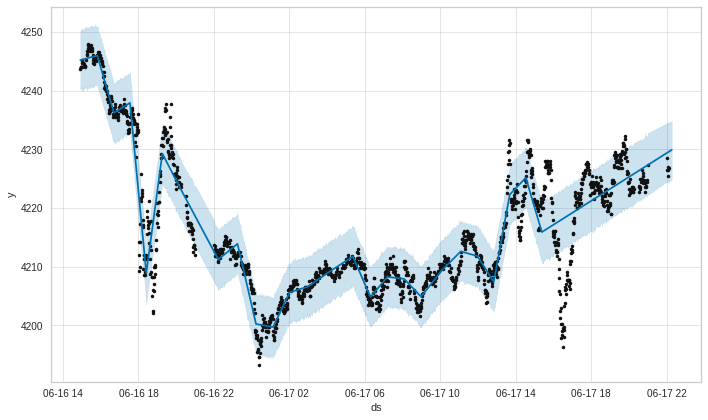

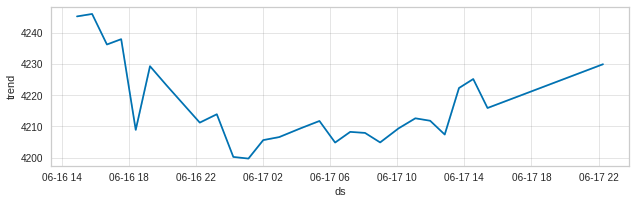

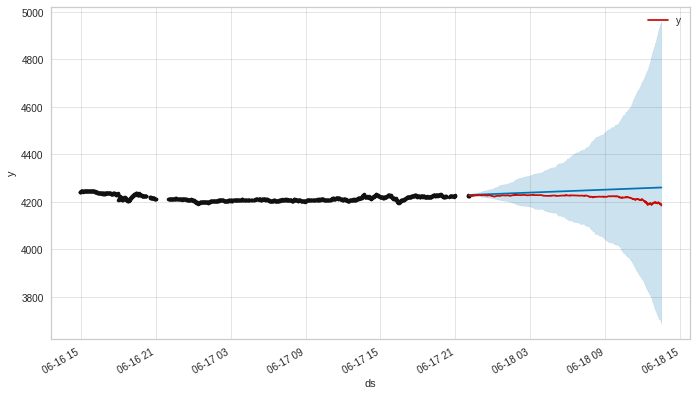

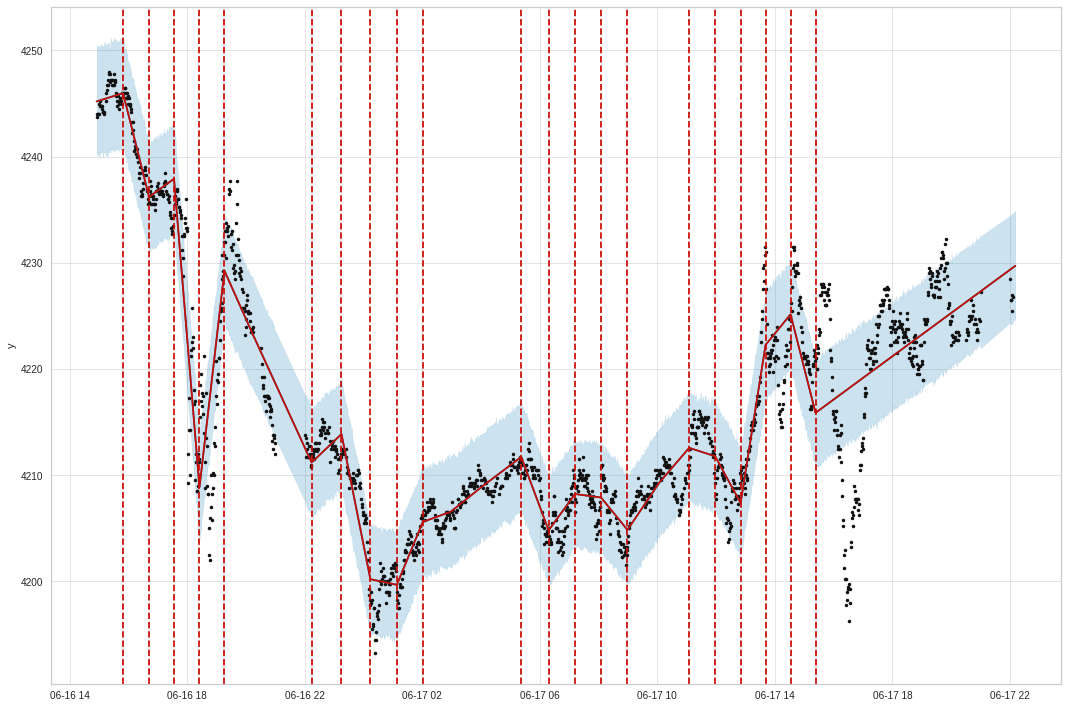

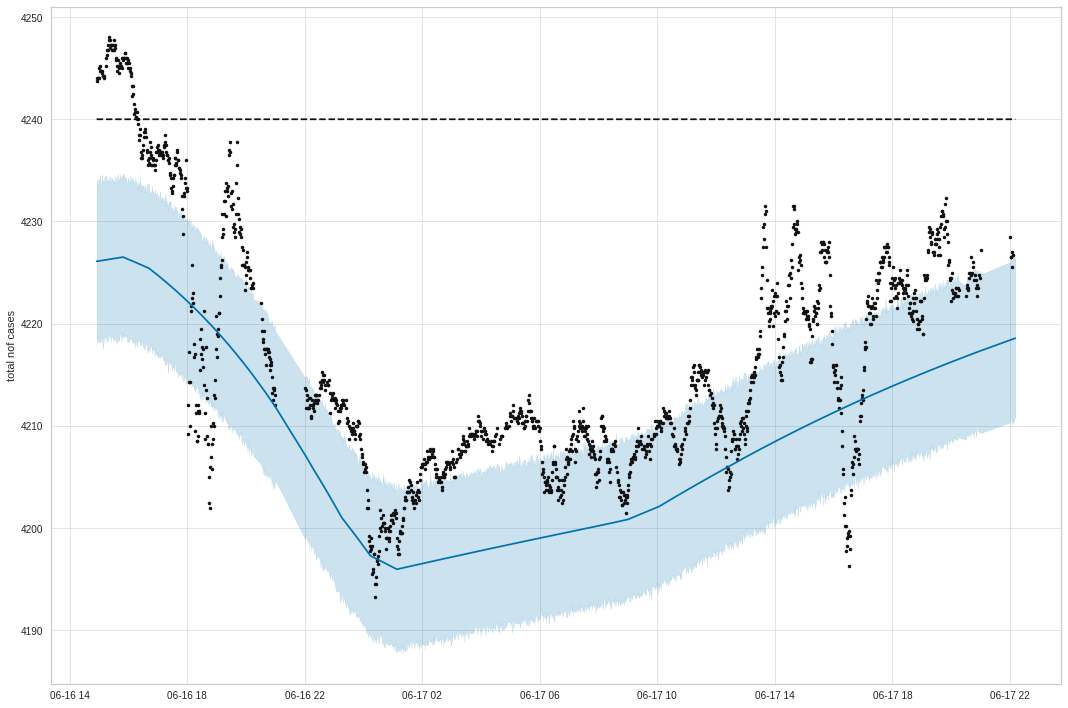

In [ ]:
# split the data into train and test
train, test = prophet_prep(df, 'close' ,0.8)
model = prophecy(train)
valid = predict(test)

changePoints = get_change_points(test)

fcst = curve_flat_line(train, 'y')

# PyCaret 


In [ ]:
train, test = split_test_train(df, 0.7)
s = setup(train, target = 'close')

,Description,Value
0,session_id,6656
1,Target,close
2,Original Data,"(1400, 58)"
3,Missing Values,True
4,Numeric Features,56
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(979, 71)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='close',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy='...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthrough'),
              

In [ ]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,1.904000e-01,7.770000e-02,2.770000e-01,9.994000e-01,0.0001,0.0000,0.022
et,Extra Trees Regressor,2.663000e-01,2.214000e-01,4.462000e-01,9.984000e-01,0.0001,0.0001,1.151
gbr,Gradient Boosting Regressor,4.198000e-01,3.725000e-01,6.084000e-01,9.973000e-01,0.0001,0.0001,0.870
lightgbm,Light Gradient Boosting Machine,3.679000e-01,4.053000e-01,6.217000e-01,9.971000e-01,0.0001,0.0001,0.793
rf,Random Forest Regressor,4.032000e-01,4.749000e-01,6.833000e-01,9.966000e-01,0.0002,0.0001,1.957
br,Bayesian Ridge,5.201000e-01,5.899000e-01,7.257000e-01,9.957000e-01,0.0002,0.0001,0.029
en,Elastic Net,5.361000e-01,6.206000e-01,7.786000e-01,9.955000e-01,0.0002,0.0001,0.037
lasso,Lasso Regression,6.407000e-01,8.326000e-01,9.005000e-01,9.940000e-01,0.0002,0.0002,0.040
omp,Orthogonal Matching Pursuit,3.378000e-01,9.537000e-01,6.094000e-01,9.938000e-01,0.0001,0.0001,0.022
dt,Decision Tree Regressor,6.412000e-01,1.118300e+00,1.034000e+00,9.919000e-01,0.0002,0.0002,0.043


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 2
INFO:logs:Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=6656, solver='auto', tol=0.001)
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
test_eval = predict_model(best_model, data=test)


fig = px.line(test_eval, x='time', y=["close", "Label"], template = 'plotly_dark')
fig.show()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=6656, solver='auto', tol=0.001), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Ridge Regression,0.5421,0.386,0.6213,0.9968,0.0001,0.0001


In [ ]:
future_dates = pd.date_range(df.time[-1:].ravel()[0], periods=100, freq='1min')

# mke a new data frame with new index and old data column names
future_df = pd.DataFrame(index=future_dates, columns=df.columns)
# fill new data frame with old data
future_df.update(df)
# fill NaN with 0
future_df = future_df.fillna(0)
# drop old time column
future_df = future_df.drop(columns=['time'])
# add new time column
future_df['time'] = future_df.index
df[:1] = df[-1:]


In [ ]:
# finalize model
final_best = finalize_model(best_model)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=6656, solver='auto', tol=0.001), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=6656, solver='auto', tol=0.001)
INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=6656, solver='auto', tol=0.001), fold=None, round=4, cross_validation=True, predict=True, fit_kwargs={}, groups=None, refit=True, verbose=False, system=False, metrics=None, experiment_custom_tags=None, add_to_model_list=False, probability_threshold=None, display=None, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Imp

In [ ]:
# generate predictions on future dataset
predictions_future = predict_model(final_best, data=future_df)
predictions_future.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=6656, solver='auto', tol=0.001), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Ridge Regression,187.8597,35291.2865,187.8598,0.0,5.241,NaN


,open,high,low,close,volume,fast_ema,slow_ema,macd,signal,sma21,...,H-PC,L-PC,TR,ATR,TSI,BP,UO,COPP,time,Label
2021-06-18 13:30:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2021-06-18 13:30:00,187.752258
2021-06-18 13:31:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2021-06-18 13:31:00,187.752258
2021-06-18 13:32:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2021-06-18 13:32:00,187.752258
2021-06-18 13:33:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2021-06-18 13:33:00,187.752258
2021-06-18 13:34:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2021-06-18 13:34:00,187.752258
